In [ ]:
import umap
!pip install umap-learn[plot]
import umap.plot
from umap import UMAP
import time
import sklearn.datasets
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, matthews_corrcoef, make_scorer
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib as mpl
import math

In [ ]:
import tensorflow
from tensorflow.keras import losses, metrics, optimizers
from tensorflow.keras.initializers import HeNormal, GlorotNormal
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, InputLayer
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical
import tensorflow.math as tfm

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
mnist = sklearn.datasets.fetch_openml('mnist_784')
print(mnist.data.shape)

(70000, 784)


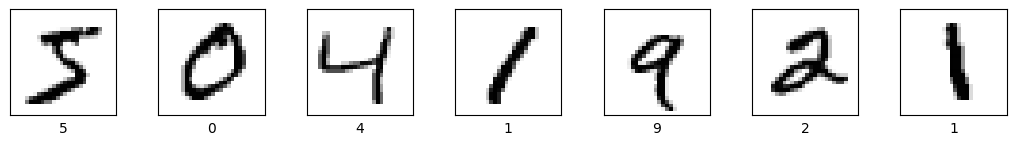

In [ ]:
names = [i for i in range(10)]
plt.figure(figsize=(15, 8))
for i in range(7):
    plt.subplot(5, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.array(mnist.data.iloc[i]).reshape((28, 28)), cmap=plt.cm.binary)
    plt.xlabel(names[int(mnist.target[i])])
plt.show()

In [ ]:
num_classes = 10
X, y = mnist.data.to_numpy(), mnist.target.astype(int)
X = X.astype(np.float32) / 255.0
y = to_categorical(y, num_classes)

In [ ]:
X.shape, y.shape

((70000, 784), (70000, 10))

In [ ]:
def plot_results(metrics, title=None, ylabel=None, xlim=None, ylim=None, metric_name=None, color=None):
    fig, ax = plt.subplots(figsize=(15, 4))

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]

    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])

    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim(xlim)
    plt.ylim(ylim)

    # ax.xaxis.set_major_locator(MultipleLocator((xlim[1] - xlim[0])/10))
    # ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    # ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()

In [ ]:
def learn(model, X, y, max_epochs, epochs_per_iter, batch_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # WARN: здесь забыт random_state!!!!!

    train_loss = []
    train_acc  = []
    valid_loss = []
    valid_acc  = []

    epoch = 0
    while epoch < max_epochs:
        training_results = model.fit(X_train, y_train, batch_size=batch_size, initial_epoch=epoch, epochs=epoch+epochs_per_iter, verbose=1, validation_data=(X_test, y_test))

        if math.isnan(training_results.history["loss"][-1]):
            break

        train_loss.extend(training_results.history["loss"])
        train_acc.extend(training_results.history["accuracy"])
        valid_loss.extend(training_results.history["val_loss"])
        valid_acc.extend(training_results.history["val_accuracy"])

        epoch += epochs_per_iter

    plot_results([ train_loss, valid_loss ],
                ylabel="Loss",
                xlim = [0, max_epochs-1],
                ylim = [0.0, max(max(train_loss), max(valid_loss))+0.01],
                metric_name=["Training Loss", "Validation Loss"],
                color=["g", "b"])

    plot_results([ train_acc, valid_acc ],
                ylabel="Accuracy",
                xlim = [0, max_epochs-1],
                ylim = [min(min(train_acc), min(valid_acc))-0.01, 1.0],
                metric_name=["Training Accuracy", "Validation Accuracy"],
                color=["g", "b"])

    y_pred = model.predict(X_test)

    print("\nClassification Report:")
    clf_report = classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), output_dict=True)
    sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, cmap='Blues')
    print("\nAdditional Metrics:")
    mcc = matthews_corrcoef(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
    print(f"MCC: {mcc:.4f}\n")

    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

(5*56000)/(1+log2(56000))/(10+784) ~= 21.0243790339952

10*(56000/784+1)*(10+784+1)+5 ~= 575812.(142857)

3500/3500 ━━━━━━━━━━━━━━━━━━━━ 32s 8ms/step - accuracy: 0.8403 - loss: 0.5622 - precision: 0.9289 - recall: 0.7434 - val_accuracy: 0.9396 - val_loss: 0.2138 - val_precision: 0.9532 - val_recall: 0.9276
Epoch 2/2
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9434 - loss: 0.2002 - precision: 0.9553 - recall: 0.9314 - val_accuracy: 0.9521 - val_loss: 0.1733 - val_precision: 0.9613 - val_recall: 0.9422
Epoch 3/3
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9552 - loss: 0.1526 - precision: 0.9643 - recall: 0.9485 - val_accuracy: 0.9568 - val_loss: 0.1479 - val_precision: 0.9642 - val_recall: 0.9512
Epoch 4/4
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9629 - loss: 0.1267 - precision: 0.9698 - recall: 0.9564 - val_accuracy: 0.9608 - val_loss: 0.1385 - val_precision: 0.9661 - val_recall: 0.9558
Epoch 5/5
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9680 - loss: 0.1068 - precision: 0.9740 - recall: 0.9633 - val_accuracy: 0.9618 - val_loss: 0.

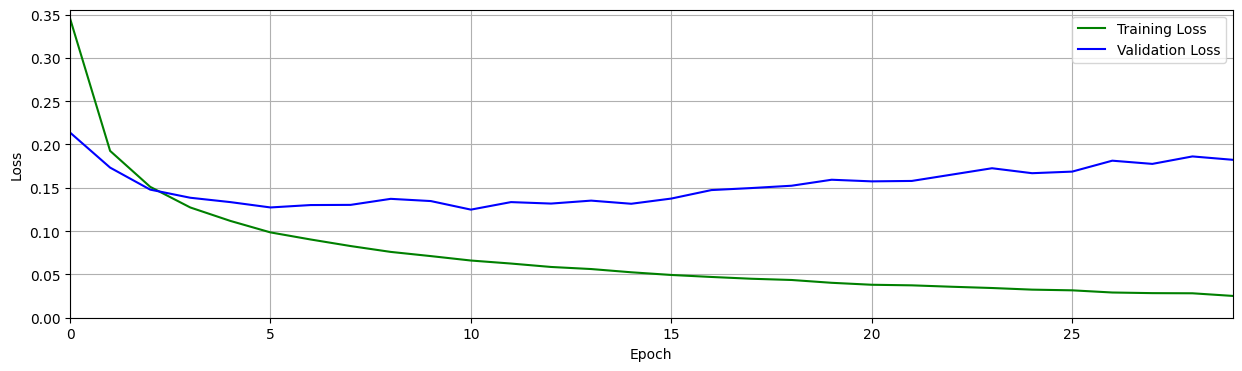

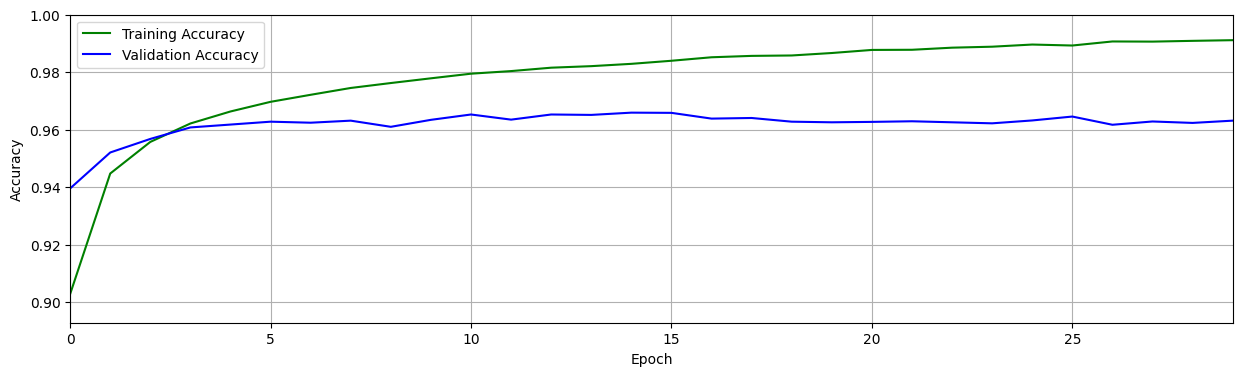

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Classification Report:

Additional Metrics:
MCC: 0.9590



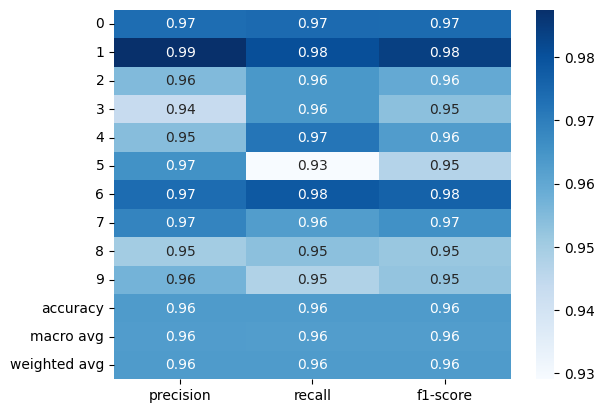

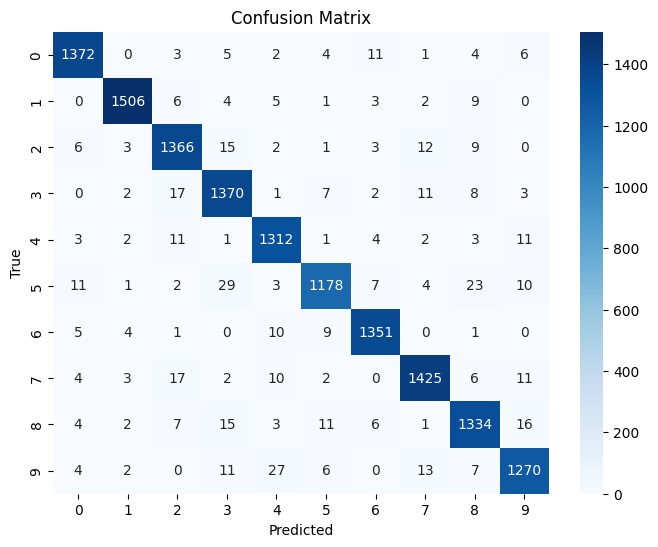

In [ ]:
model_1 = Sequential()
initializer = GlorotNormal()
model_1.add(InputLayer(input_shape=(X.shape[1],), activation='relu', kernel_initializer=initializer))
model_1.add(Dense(28, activation='relu', kernel_initializer=initializer))
model_1.add(Dense(num_classes, activation='softmax', kernel_initializer=initializer))

metrics = ['accuracy', 'precision', 'recall']

model_1.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=metrics,
)

learn(model_1, X, y, 30, 1, 16)

3500/3500 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8504 - loss: 0.5151 - precision: 0.9353 - recall: 0.7576 - val_accuracy: 0.9356 - val_loss: 0.2231 - val_precision: 0.9506 - val_recall: 0.9232
Epoch 2/2
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9469 - loss: 0.1833 - precision: 0.9584 - recall: 0.9364 - val_accuracy: 0.9491 - val_loss: 0.1709 - val_precision: 0.9594 - val_recall: 0.9417
Epoch 3/3
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9558 - loss: 0.1482 - precision: 0.9643 - recall: 0.9493 - val_accuracy: 0.9547 - val_loss: 0.1565 - val_precision: 0.9619 - val_recall: 0.9479
Epoch 4/4
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.9614 - loss: 0.1255 - precision: 0.9683 - recall: 0.9564 - val_accuracy: 0.9564 - val_loss: 0.1471 - val_precision: 0.9623 - val_recall: 0.9518
Epoch 5/5
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9679 - loss: 0.1051 - precision: 0.9730 - recall: 0.9643 - val_accuracy: 0.9566 - val_loss: 0.

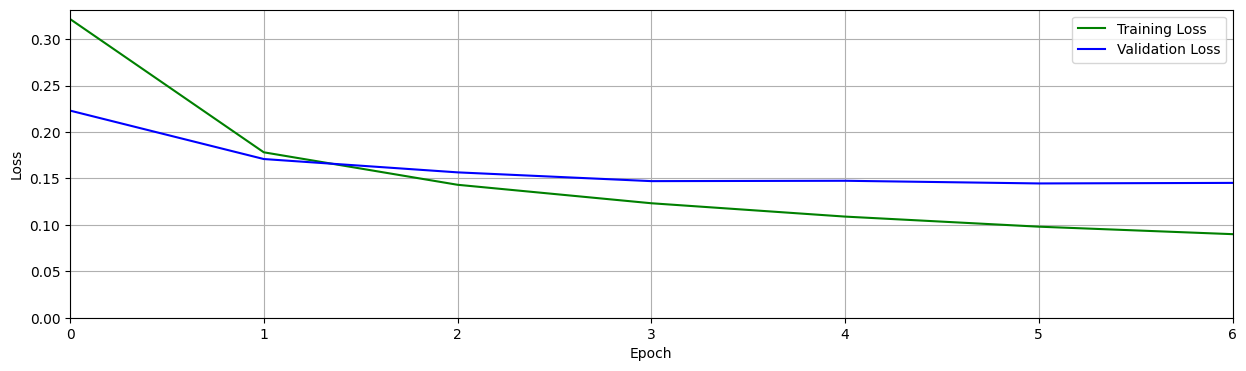

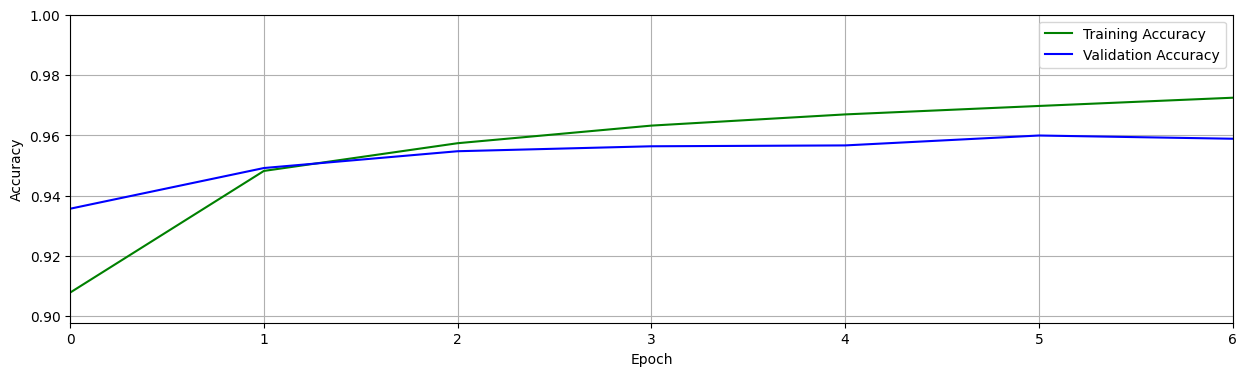

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Classification Report:

Additional Metrics:
MCC: 0.9543



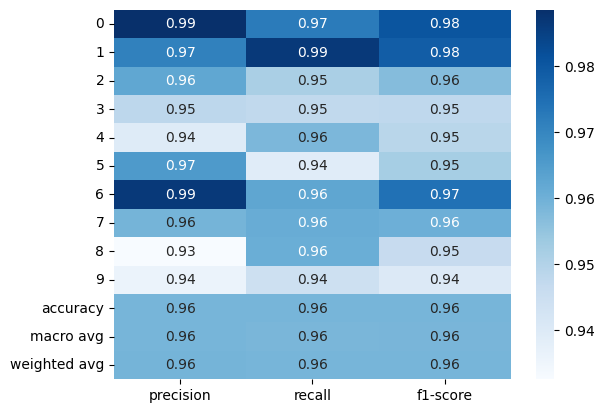

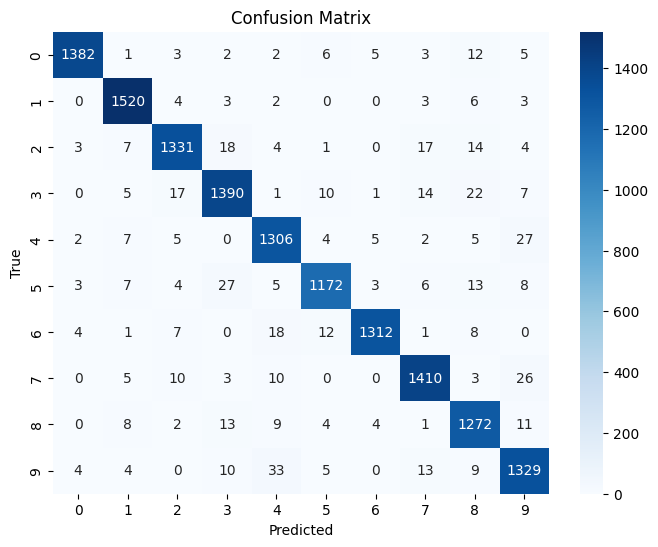

In [ ]:
model_1 = Sequential()
initializer = GlorotNormal()
model_1.add(InputLayer(input_shape=(X.shape[1],), activation='relu', kernel_initializer=initializer))
model_1.add(Dense(28, activation='relu', kernel_initializer=initializer))
model_1.add(Dense(num_classes, activation='softmax', kernel_initializer=initializer))

metrics = ['accuracy', 'precision', 'recall']

model_1.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=metrics,
)

learn(model_1, X, y, 7, 1, 16)

1750/1750 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8347 - loss: 0.6050 - precision: 0.9339 - recall: 0.7124 - val_accuracy: 0.9320 - val_loss: 0.2314 - val_precision: 0.9495 - val_recall: 0.9165
Epoch 2/2
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9358 - loss: 0.2210 - precision: 0.9515 - recall: 0.9239 - val_accuracy: 0.9431 - val_loss: 0.1865 - val_precision: 0.9547 - val_recall: 0.9341
Epoch 3/3
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9502 - loss: 0.1740 - precision: 0.9610 - recall: 0.9418 - val_accuracy: 0.9517 - val_loss: 0.1621 - val_precision: 0.9617 - val_recall: 0.9442
Epoch 4/4
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9597 - loss: 0.1384 - precision: 0.9677 - recall: 0.9534 - val_accuracy: 0.9539 - val_loss: 0.1517 - val_precision: 0.9604 - val_recall: 0.9474
Epoch 5/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9611 - loss: 0.1299 - precision: 0.9687 - recall: 0.9550 - val_accuracy: 0.9547 - val_loss: 0.1451 

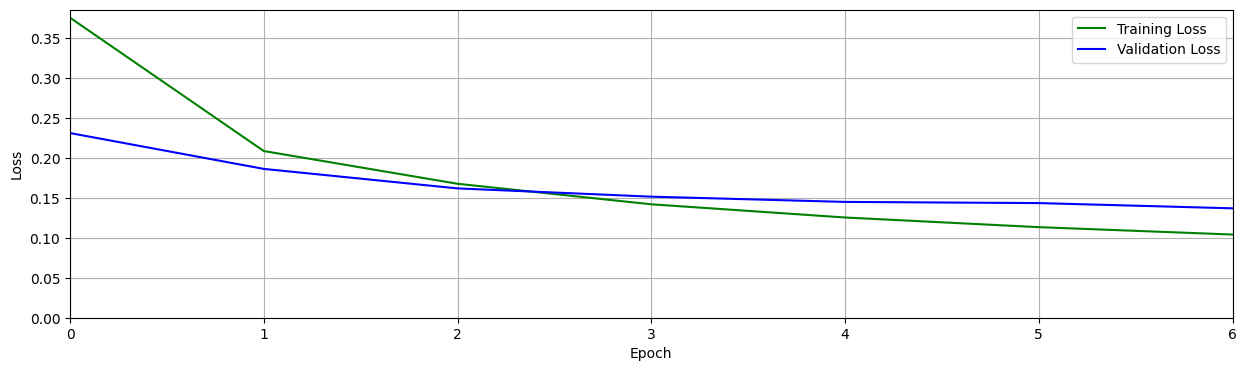

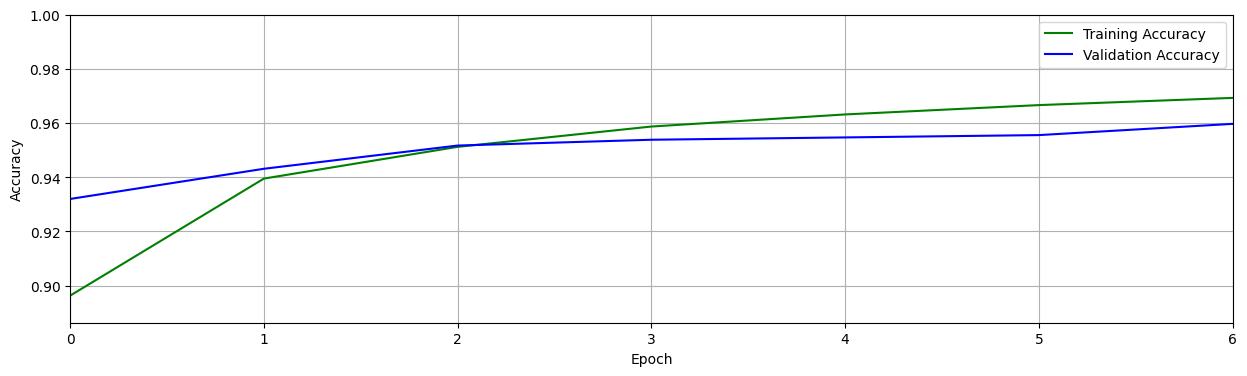

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Classification Report:

Additional Metrics:
MCC: 0.9553



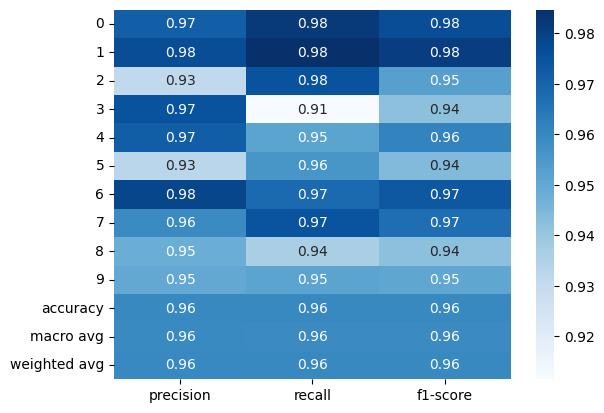

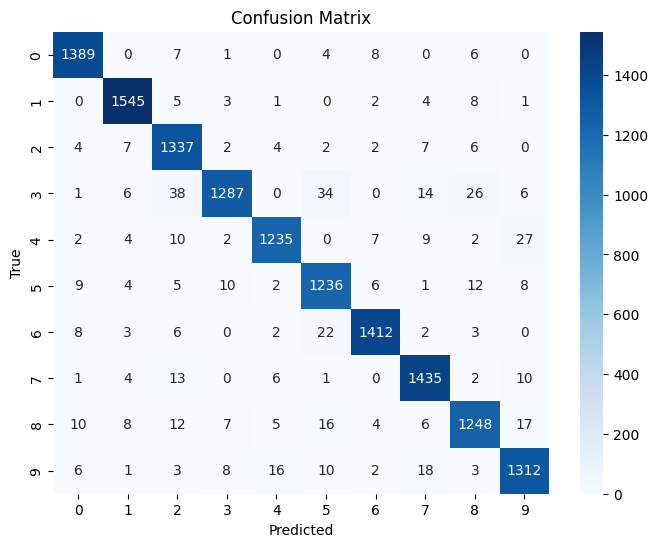

In [ ]:
model_1 = Sequential()
initializer = GlorotNormal()
model_1.add(InputLayer(input_shape=(X.shape[1],), activation='relu', kernel_initializer=initializer))
model_1.add(Dense(28, activation='relu', kernel_initializer=initializer))
model_1.add(Dense(num_classes, activation='softmax', kernel_initializer=initializer))

metrics = ['accuracy', 'precision', 'recall']

model_1.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=metrics,
)

learn(model_1, X, y, 7, 1, 32)

875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7798 - loss: 0.7782 - precision: 0.9300 - recall: 0.6131 - val_accuracy: 0.9248 - val_loss: 0.2687 - val_precision: 0.9444 - val_recall: 0.9036
Epoch 2/2
875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9311 - loss: 0.2426 - precision: 0.9502 - recall: 0.9143 - val_accuracy: 0.9362 - val_loss: 0.2218 - val_precision: 0.9510 - val_recall: 0.9257
Epoch 3/3
875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9441 - loss: 0.1895 - precision: 0.9568 - recall: 0.9336 - val_accuracy: 0.9446 - val_loss: 0.1964 - val_precision: 0.9561 - val_recall: 0.9351
Epoch 4/4
875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9543 - loss: 0.1621 - precision: 0.9652 - recall: 0.9449 - val_accuracy: 0.9486 - val_loss: 0.1836 - val_precision: 0.9603 - val_recall: 0.9396
Epoch 5/5
875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9587 - loss: 0.1450 - precision: 0.9677 - recall: 0.9522 - val_accuracy: 0.9499 - val_loss: 0.1760 - val_prec

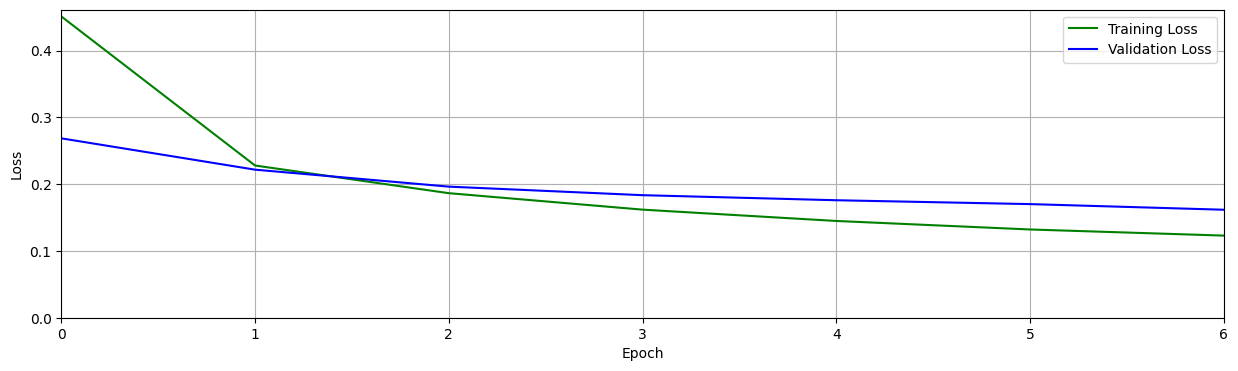

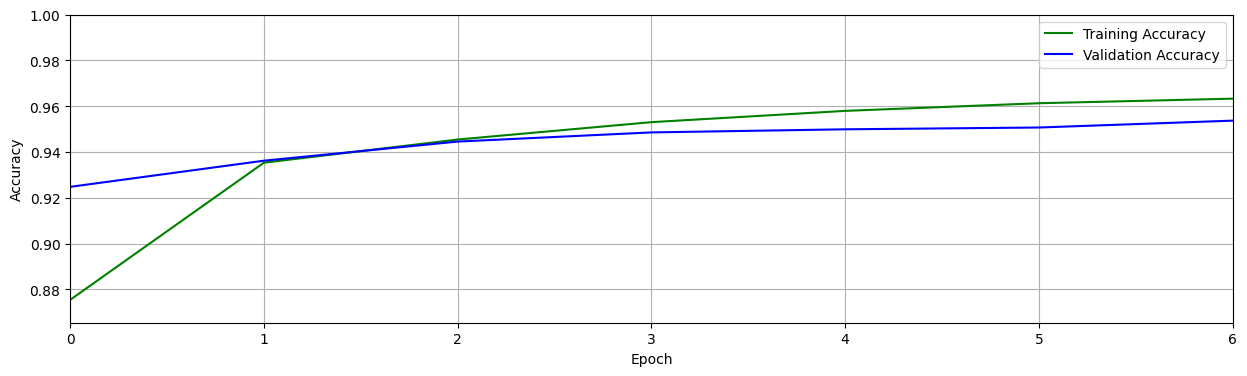

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report:

Additional Metrics:
MCC: 0.9486



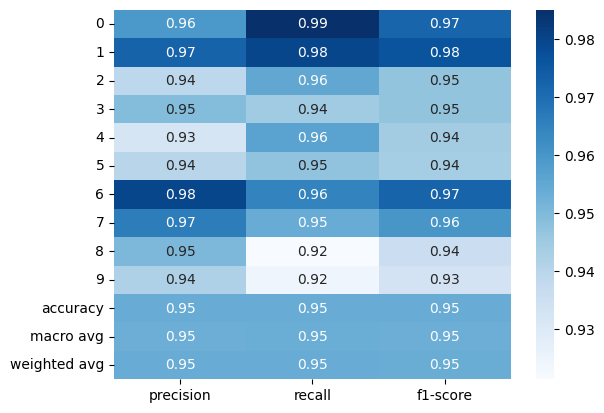

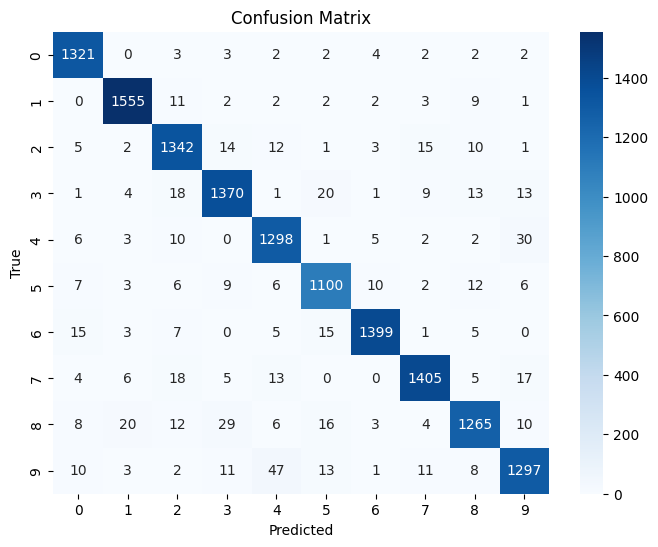

In [ ]:
model_1 = Sequential()
initializer = GlorotNormal()
model_1.add(InputLayer(input_shape=(X.shape[1],), activation='relu', kernel_initializer=initializer))
model_1.add(Dense(28, activation='relu', kernel_initializer=initializer))
model_1.add(Dense(num_classes, activation='softmax', kernel_initializer=initializer))

metrics = ['accuracy', 'precision', 'recall']

model_1.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=metrics,
)

learn(model_1, X, y, 7, 1, 64)

In [ ]:
umap_3d_embeddings = UMAP(n_components=3, random_state=7).fit_transform(X)

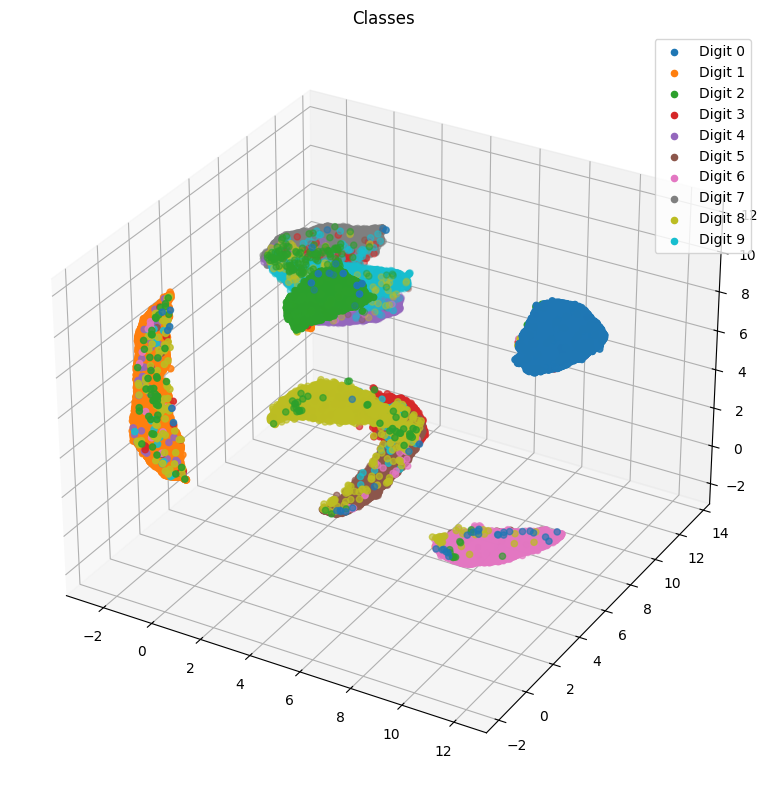

In [ ]:
plt.figure(figsize=(8,8))

ax = plt.axes(projection='3d')
labels = mnist.target.astype(int)

for i in np.unique(labels):
    digit_indices = (labels == i)
    dims = [umap_3d_embeddings[digit_indices, i] for i in range(umap_3d_embeddings.shape[1])]
    ax.scatter(*dims, label=f"Digit {i}")
    ax.legend(loc='best')

plt.title('Classes')
plt.tight_layout()
plt.legend()
plt.show()

(5*56000)/(1+log2(56000))/(10+3) ~= 1284.1043809993992

10*(56000/3+1)*(10+3+1)+5 ~= 2613478.(3)

1750/1750 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9193 - loss: 0.4109 - precision: 0.9563 - recall: 0.8611 - val_accuracy: 0.9625 - val_loss: 0.2415 - val_precision: 0.9639 - val_recall: 0.9605
Epoch 2/2
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9661 - loss: 0.2062 - precision: 0.9676 - recall: 0.9648 - val_accuracy: 0.9653 - val_loss: 0.1959 - val_precision: 0.9661 - val_recall: 0.9650
Epoch 3/3
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9663 - loss: 0.2012 - precision: 0.9675 - recall: 0.9654 - val_accuracy: 0.9656 - val_loss: 0.1972 - val_precision: 0.9658 - val_recall: 0.9651
Epoch 4/4
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9678 - loss: 0.1921 - precision: 0.9686 - recall: 0.9672 - val_accuracy: 0.9649 - val_loss: 0.2070 - val_precision: 0.9657 - val_recall: 0.9634
Epoch 5/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9673 - loss: 0.1923 - precision: 0.9683 - recall: 0.9663 - val_accuracy: 0.9549 - val_loss: 0.2176

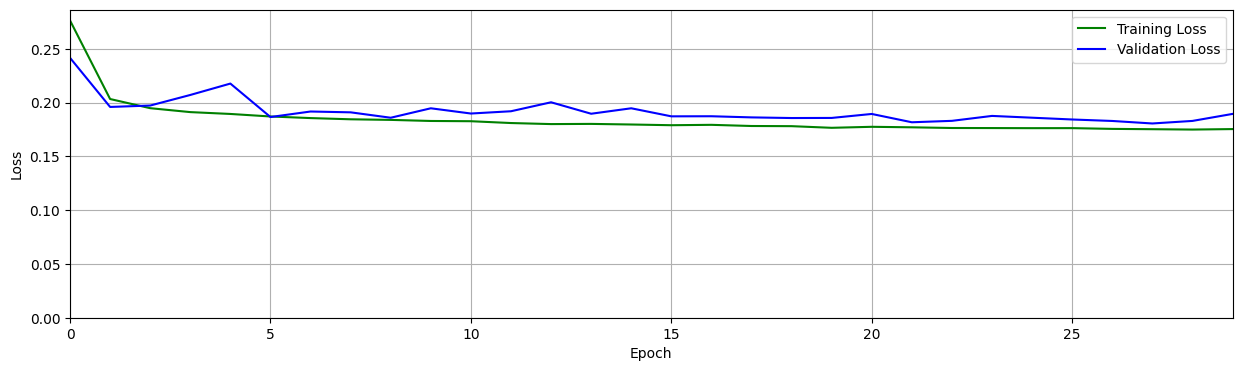

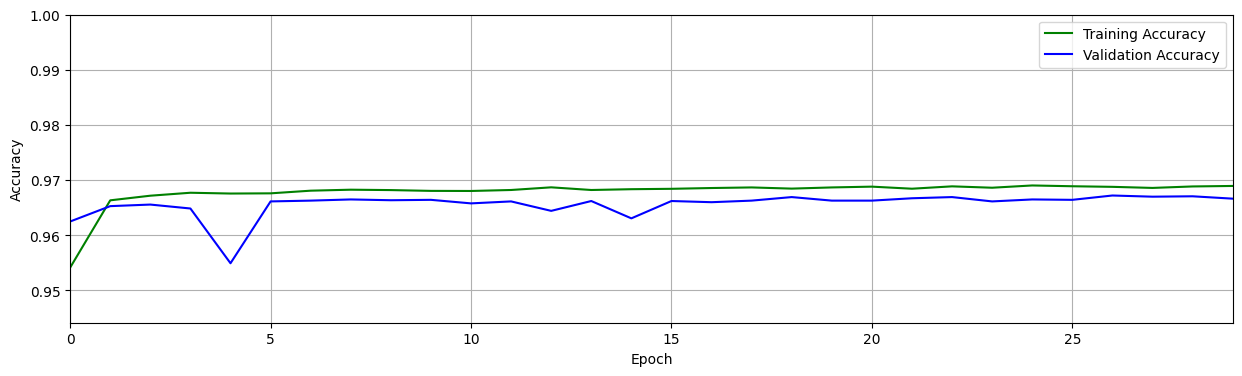

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Classification Report:

Additional Metrics:
MCC: 0.9630



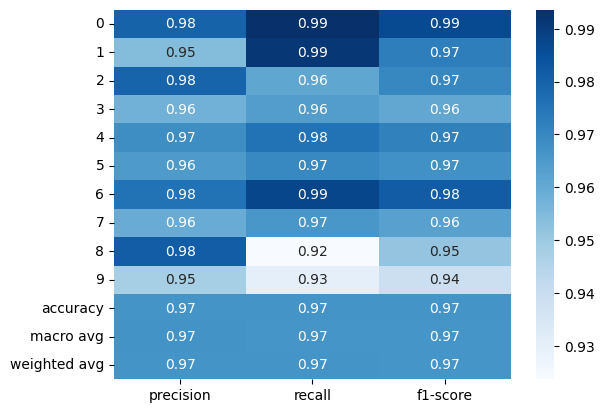

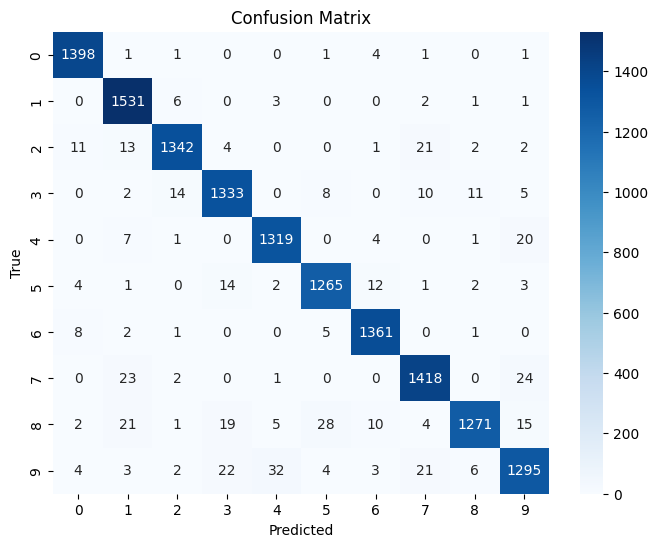

In [ ]:
model_2 = Sequential()
initializer = GlorotNormal()
model_2.add(InputLayer(input_shape=(umap_3d_embeddings.shape[1],), activation='relu', kernel_initializer=initializer))
model_2.add(Dense(1285, activation='relu', kernel_initializer=initializer))
model_2.add(Dense(num_classes, activation='softmax', kernel_initializer=initializer))

metrics = ['accuracy', 'precision', 'recall']

model_2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=metrics,
)

learn(model_2, umap_3d_embeddings, y, 30, 1, 32)

1750/1750 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9312 - loss: 0.3162 - precision: 0.9484 - recall: 0.9183 - val_accuracy: 0.9649 - val_loss: 0.2070 - val_precision: 0.9663 - val_recall: 0.9639
Epoch 2/2
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 55s 32ms/step - accuracy: 0.9648 - loss: 0.2004 - precision: 0.9659 - recall: 0.9639 - val_accuracy: 0.9675 - val_loss: 0.1906 - val_precision: 0.9689 - val_recall: 0.9666
Epoch 3/3
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 50s 29ms/step - accuracy: 0.9679 - loss: 0.1858 - precision: 0.9685 - recall: 0.9673 - val_accuracy: 0.9649 - val_loss: 0.1968 - val_precision: 0.9656 - val_recall: 0.9646
Epoch 4/4
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 53s 30ms/step - accuracy: 0.9670 - loss: 0.1868 - precision: 0.9677 - recall: 0.9665 - val_accuracy: 0.9649 - val_loss: 0.1939 - val_precision: 0.9656 - val_recall: 0.9645
Epoch 5/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 51s 29ms/step - accuracy: 0.9690 - loss: 0.1786 - precision: 0.9696 - recall: 0.9684 - val_accuracy: 0.9658 - val_los

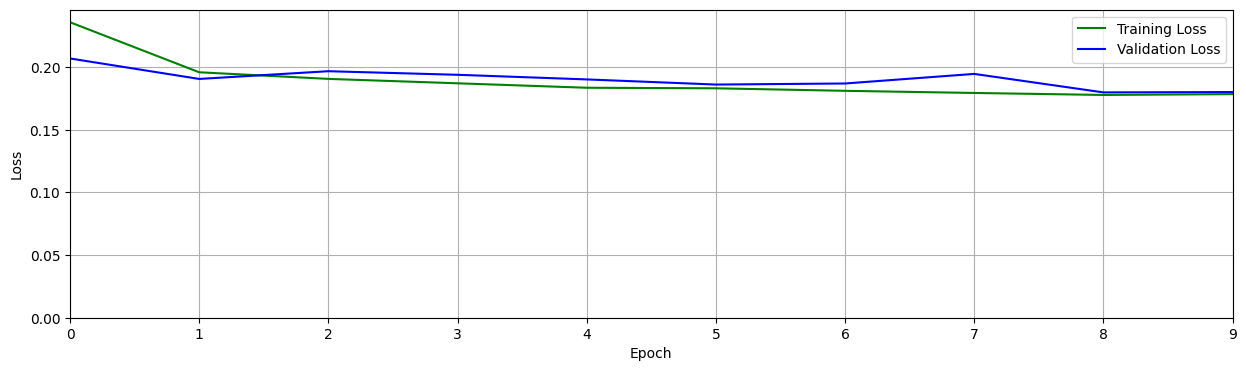

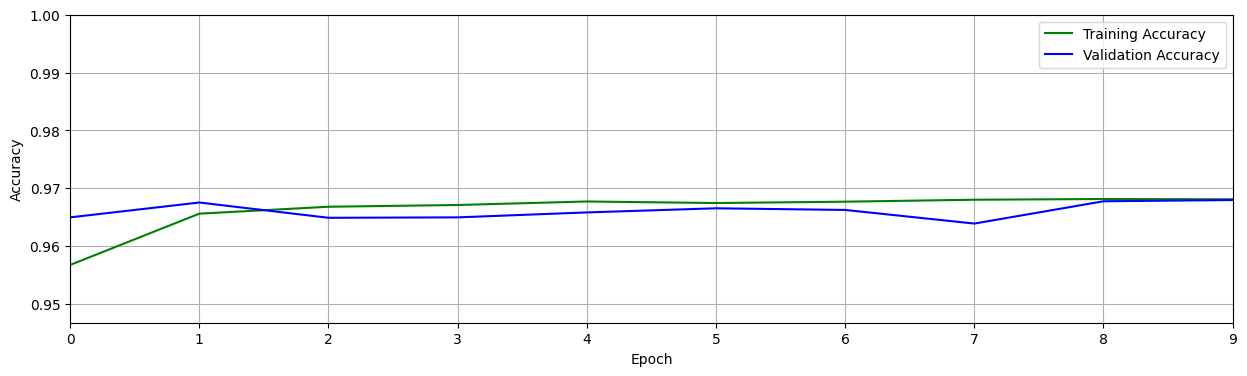

438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

Classification Report:

Additional Metrics:
MCC: 0.9644



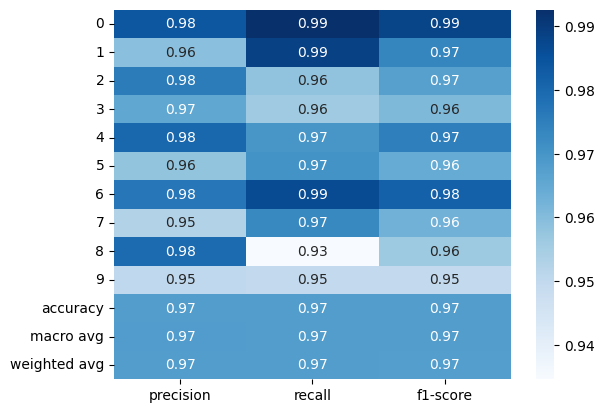

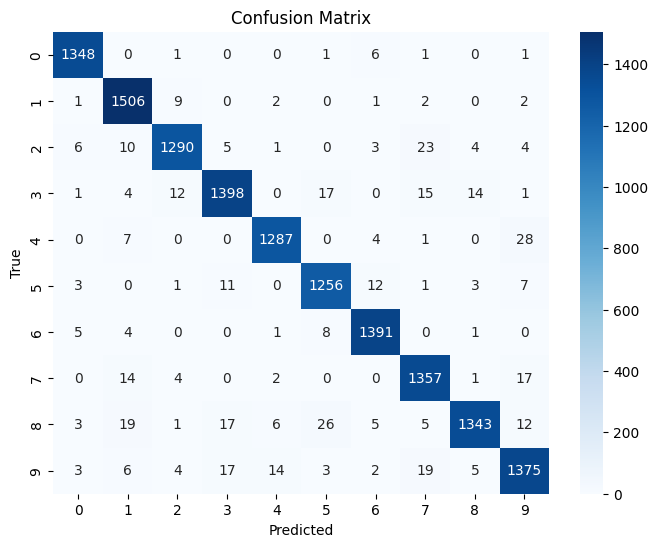

In [ ]:
model_3 = Sequential()
initializer = GlorotNormal()
model_3.add(InputLayer(input_shape=(umap_3d_embeddings.shape[1],), activation='relu', kernel_initializer=initializer))
model_3.add(Dense(1285, activation='relu', kernel_initializer=initializer))
model_3.add(Dense(1285, activation='relu', kernel_initializer=initializer))
model_3.add(Dense(num_classes, activation='softmax', kernel_initializer=initializer))

metrics = ['accuracy', 'precision', 'recall']

model_3.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=metrics,
)

learn(model_3, umap_3d_embeddings, y, 10, 1, 32)

3500/3500 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9396 - loss: 0.3035 - precision: 0.9598 - recall: 0.9208 - val_accuracy: 0.9609 - val_loss: 0.2545 - val_precision: 0.9620 - val_recall: 0.9592
Epoch 2/2
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9640 - loss: 0.2174 - precision: 0.9651 - recall: 0.9624 - val_accuracy: 0.9671 - val_loss: 0.2191 - val_precision: 0.9677 - val_recall: 0.9667
Epoch 3/3
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9659 - loss: 0.2031 - precision: 0.9670 - recall: 0.9646 - val_accuracy: 0.9649 - val_loss: 0.2014 - val_precision: 0.9656 - val_recall: 0.9638
Epoch 4/4
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9665 - loss: 0.1988 - precision: 0.9675 - recall: 0.9654 - val_accuracy: 0.9649 - val_loss: 0.2108 - val_precision: 0.9652 - val_recall: 0.9637
Epoch 5/5
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9655 - loss: 0.1997 - precision: 0.9667 - recall: 0.9646 - val_accuracy: 0.9677 - val_loss: 0.

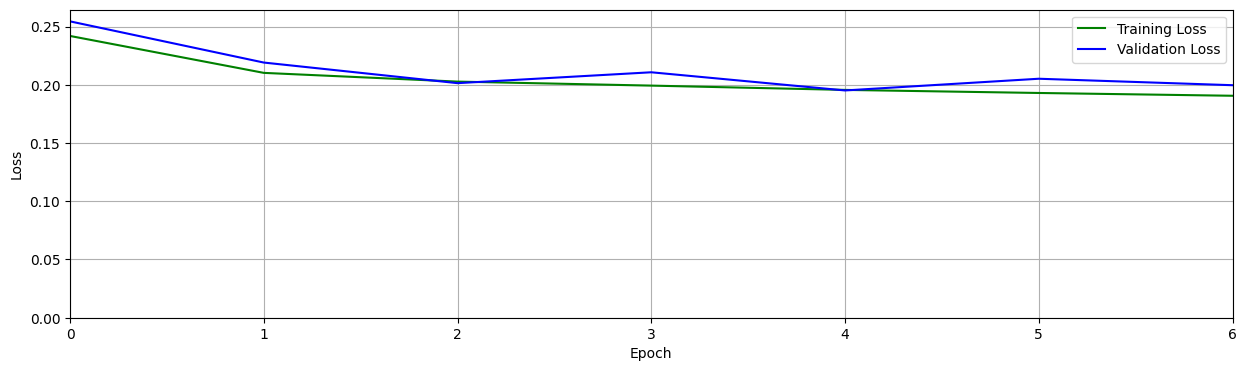

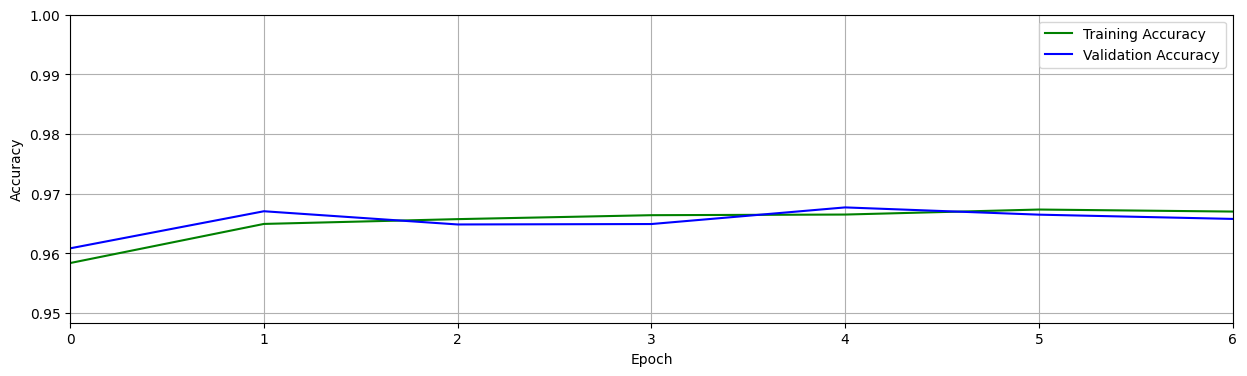

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Classification Report:

Additional Metrics:
MCC: 0.9620



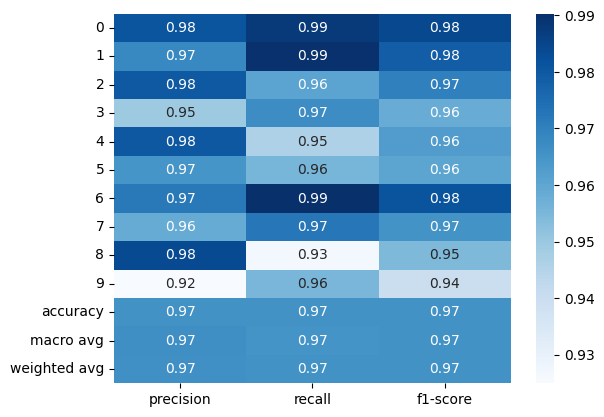

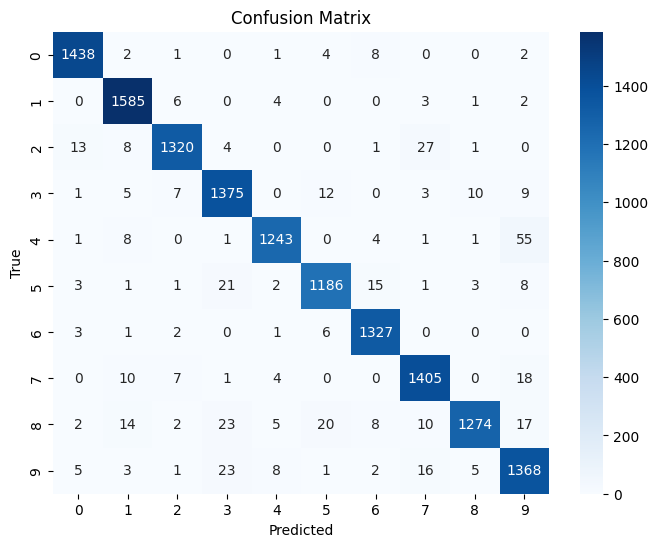

In [ ]:
def sigmoid_b10(x):
    return tfm.divide(1.0, tfm.add(1.0, tfm.exp(tfm.multiply(x, -10.0))))

actv = Activation(sigmoid_b10)

model_2 = Sequential()
initializer = GlorotNormal()
model_2.add(InputLayer(input_shape=(umap_3d_embeddings.shape[1],), activation=actv, kernel_initializer=initializer))
model_2.add(Dense(1285, activation=actv, kernel_initializer=initializer))
model_2.add(Dense(num_classes, activation='softmax', kernel_initializer=initializer))

metrics = ['accuracy', 'precision', 'recall']

model_2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=metrics,
)

learn(model_2, umap_3d_embeddings, y, 7, 1, 16)

In [ ]:
images, target = sklearn.datasets.load_digits(return_X_y=True, as_frame=True)
print(images.shape)

(1797, 64)


In [ ]:
X, y = images, target.astype(int)
X = X.astype(np.float32) / 255.0
y = to_categorical(y, num_classes)

(5*56000)/(1+log2(56000))/(10+64) ~= 225.58590477016472

10*(56000/64+1)*(10+64+1)+5 ~= 657005

45/45 ━━━━━━━━━━━━━━━━━━━━ 45s 21ms/step - accuracy: 0.2056 - loss: 2.2825 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.6417 - val_loss: 2.2078 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/2
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7433 - loss: 2.1738 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.8056 - val_loss: 2.0432 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/3
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7956 - loss: 1.9928 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.8639 - val_loss: 1.7972 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/4
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8275 - loss: 1.7346 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.8500 - val_loss: 1.5166 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8329 - loss: 1.4580 - precision: 0.2609 - recall: 4.7

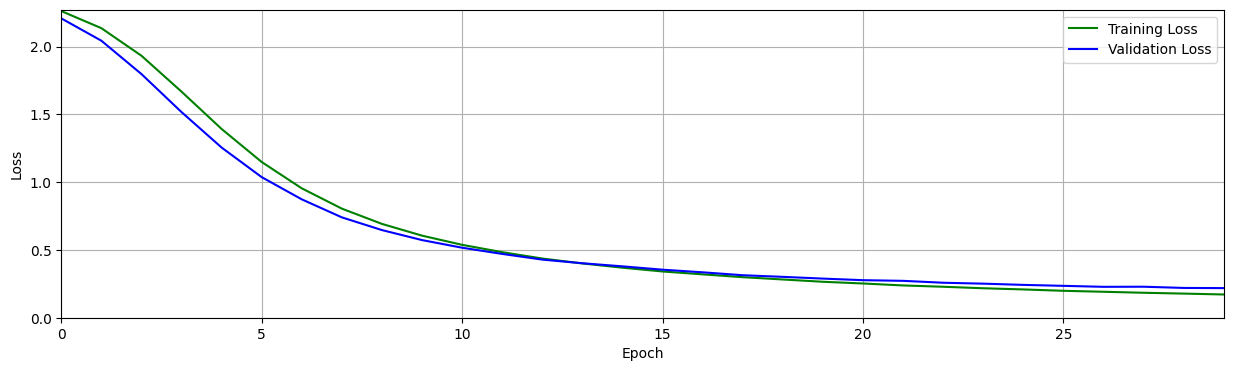

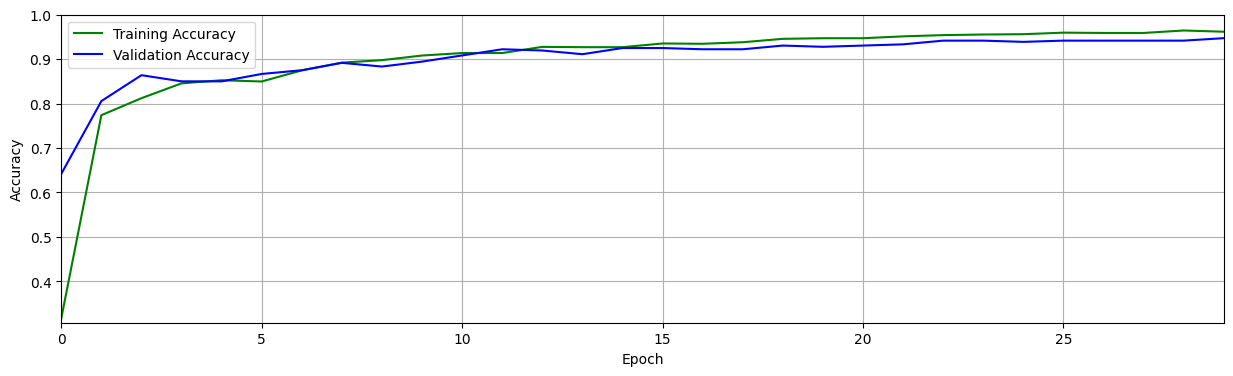

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

Classification Report:

Additional Metrics:
MCC: 0.9413



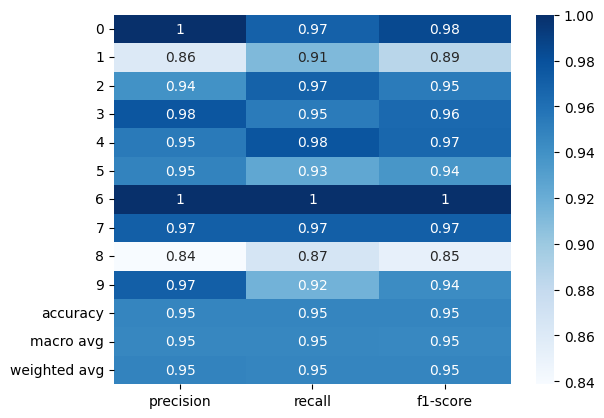

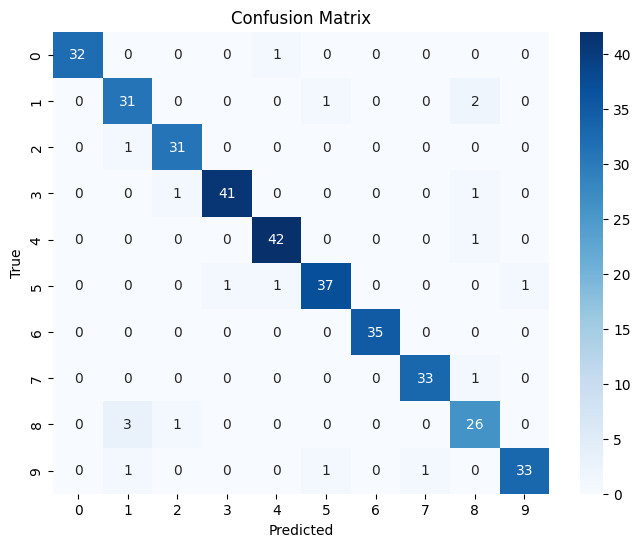

In [ ]:
model_4 = Sequential()
initializer = GlorotNormal()
model_4.add(InputLayer(input_shape=(X.shape[1],), activation='relu', kernel_initializer=initializer))
model_4.add(Dense(256, activation='relu', kernel_initializer=initializer))
model_4.add(Dense(num_classes, activation='softmax', kernel_initializer=initializer))

metrics = ['accuracy', 'precision', 'recall']

model_4.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=metrics,
)

learn(model_4, X, y, 30, 1, 32)

90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.3678 - loss: 2.2654 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.5444 - val_loss: 2.1212 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/2
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6938 - loss: 2.0144 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.7333 - val_loss: 1.7366 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7798 - loss: 1.5906 - precision: 0.2967 - recall: 0.0013 - val_accuracy: 0.7528 - val_loss: 1.3101 - val_precision: 1.0000 - val_recall: 0.0528
Epoch 4/4
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8469 - loss: 1.1528 - precision: 0.9992 - recall: 0.1532 - val_accuracy: 0.8056 - val_loss: 0.9865 - val_precision: 1.0000 - val_recall: 0.3556
Epoch 5/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8701 - loss: 0.8748 - precision: 0.9985 - recall: 0.4302 - val_accuracy: 0.8194 - val_

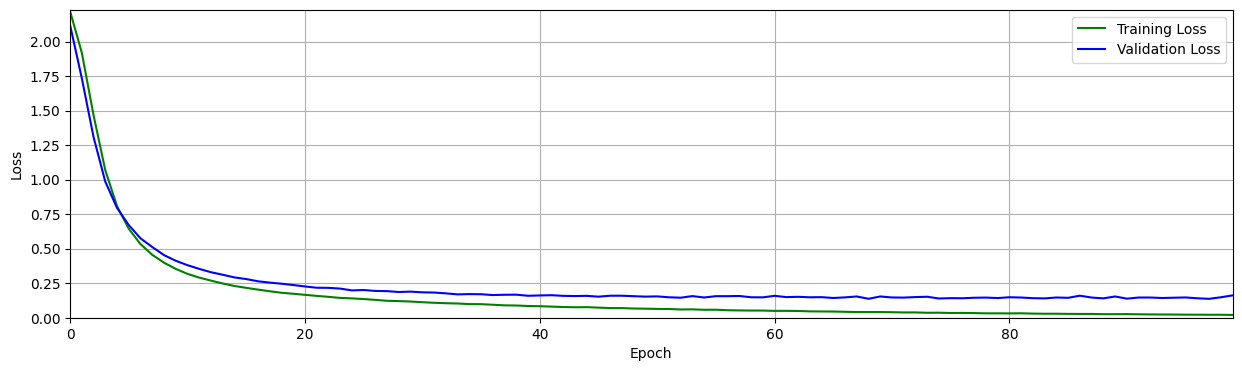

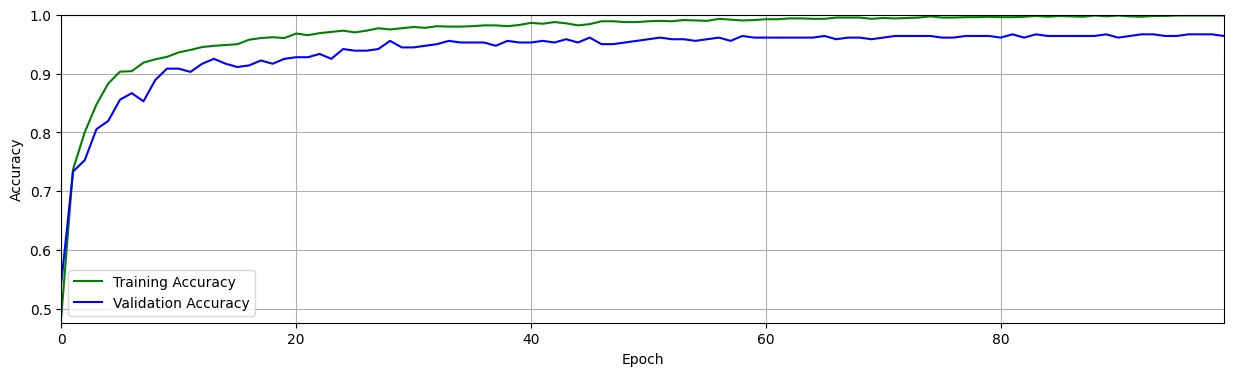

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

Classification Report:

Additional Metrics:
MCC: 0.9601



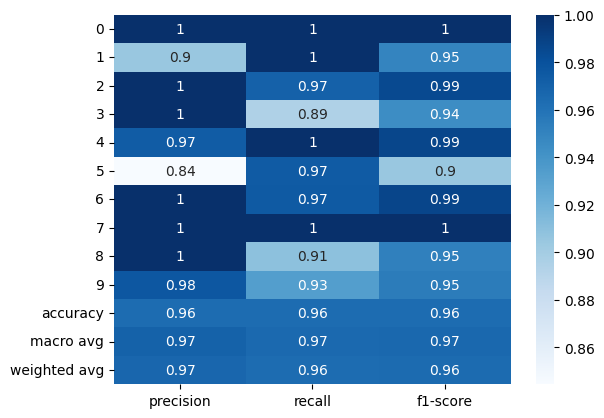

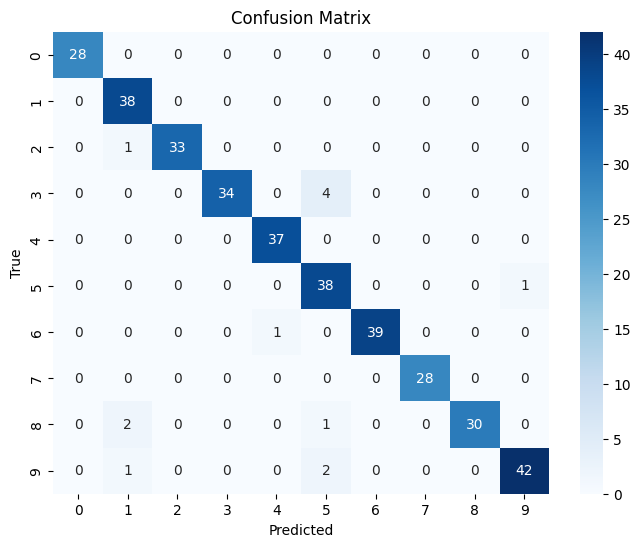

In [ ]:
model_4 = Sequential()
initializer = GlorotNormal()
model_4.add(InputLayer(input_shape=(X.shape[1],), activation='relu', kernel_initializer=initializer))
model_4.add(Dense(256, activation='relu', kernel_initializer=initializer))
model_4.add(Dense(num_classes, activation='softmax', kernel_initializer=initializer))

metrics = ['accuracy', 'precision', 'recall']

model_4.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=metrics,
)

learn(model_4, X, y, 100, 1, 16)

90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.4748 - loss: 2.2556 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.6139 - val_loss: 2.0967 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/2
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7559 - loss: 1.9994 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.7917 - val_loss: 1.7109 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8175 - loss: 1.5839 - precision: 0.3956 - recall: 0.0035 - val_accuracy: 0.8111 - val_loss: 1.3066 - val_precision: 1.0000 - val_recall: 0.0722
Epoch 4/4
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8412 - loss: 1.1631 - precision: 0.9890 - recall: 0.1609 - val_accuracy: 0.8417 - val_loss: 0.9809 - val_precision: 1.0000 - val_recall: 0.3417
Epoch 5/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8948 - loss: 0.8603 - precision: 0.9987 - recall: 0.4503 - val_accuracy: 0.8667 - val_

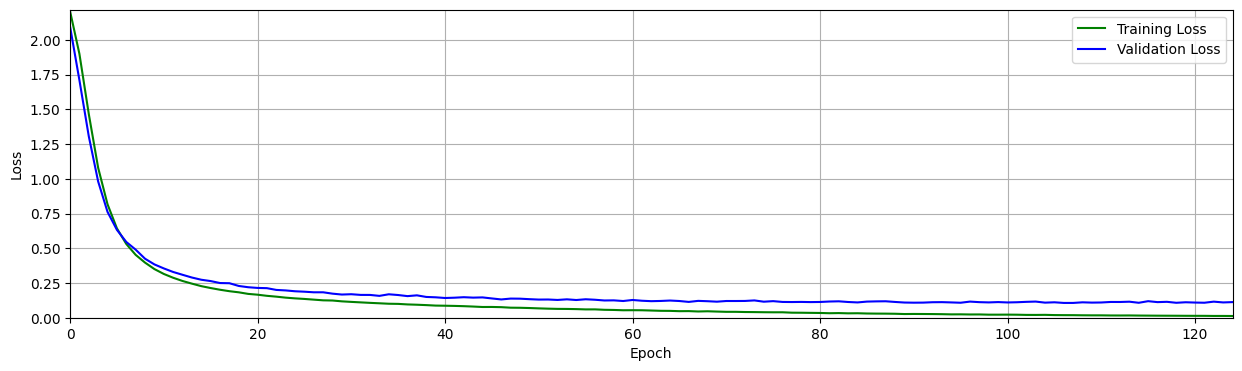

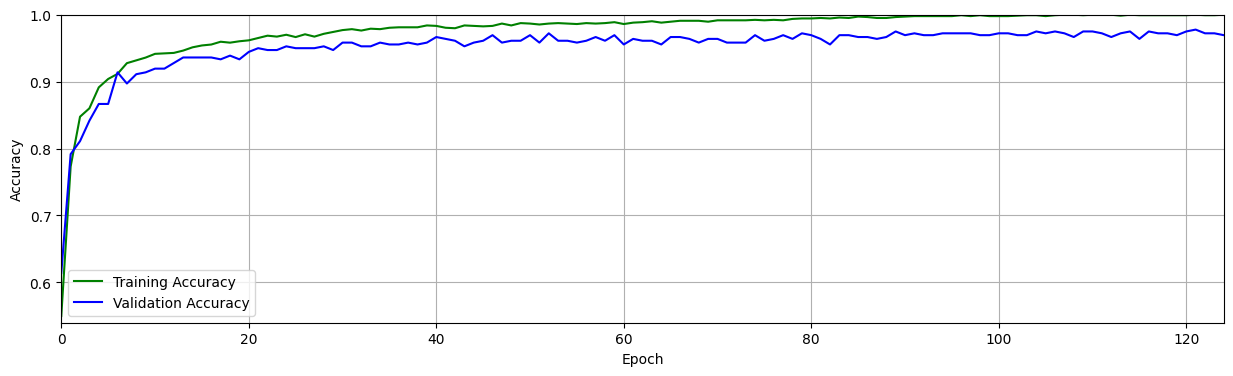

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

Classification Report:

Additional Metrics:
MCC: 0.9661



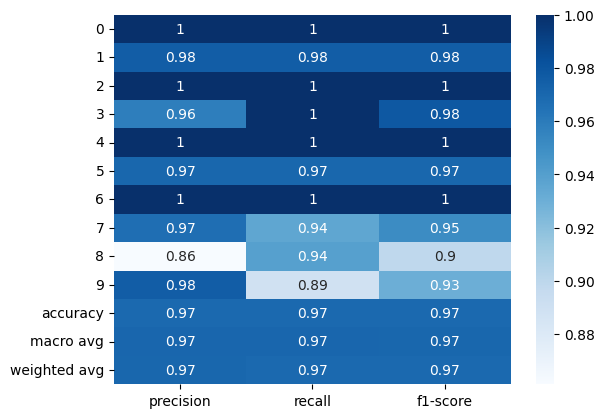

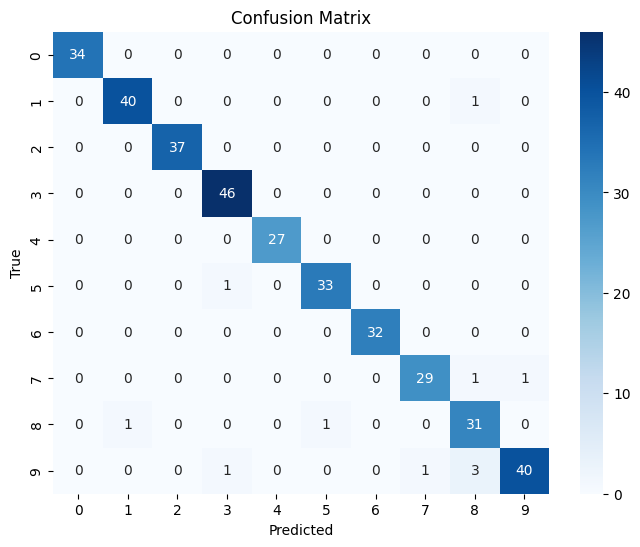

In [ ]:
model_4 = Sequential()
initializer = GlorotNormal()
model_4.add(InputLayer(input_shape=(X.shape[1],), activation='relu', kernel_initializer=initializer))
model_4.add(Dense(256, activation='relu', kernel_initializer=initializer))
model_4.add(Dense(num_classes, activation='softmax', kernel_initializer=initializer))

metrics = ['accuracy', 'precision', 'recall']

model_4.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=metrics,
)

learn(model_4, X, y, 125, 1, 16)

90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.3848 - loss: 2.2486 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.7250 - val_loss: 2.0391 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/2
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7645 - loss: 1.9130 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.7917 - val_loss: 1.5257 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8296 - loss: 1.3730 - precision: 0.6593 - recall: 0.0250 - val_accuracy: 0.8472 - val_loss: 1.0499 - val_precision: 1.0000 - val_recall: 0.2750
Epoch 4/4
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8970 - loss: 0.9238 - precision: 0.9998 - recall: 0.3625 - val_accuracy: 0.8306 - val_loss: 0.7884 - val_precision: 0.9952 - val_recall: 0.5778
Epoch 5/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8808 - loss: 0.6981 - precision: 0.9908 - recall: 0.6047 - val_accuracy: 0.8667 - va

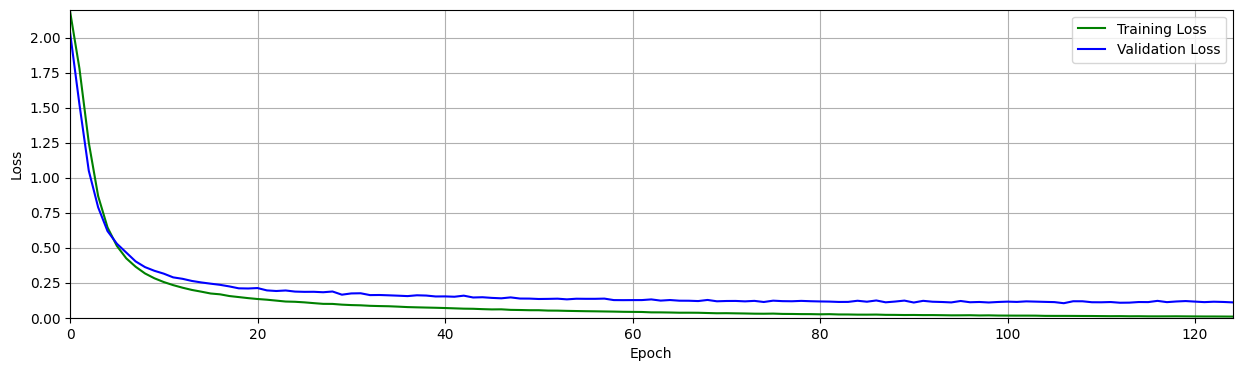

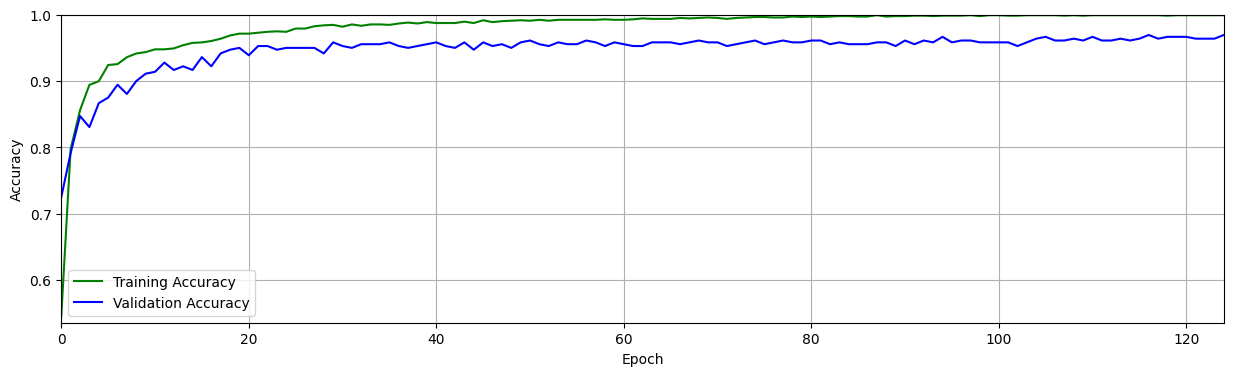

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

Classification Report:

Additional Metrics:
MCC: 0.9660



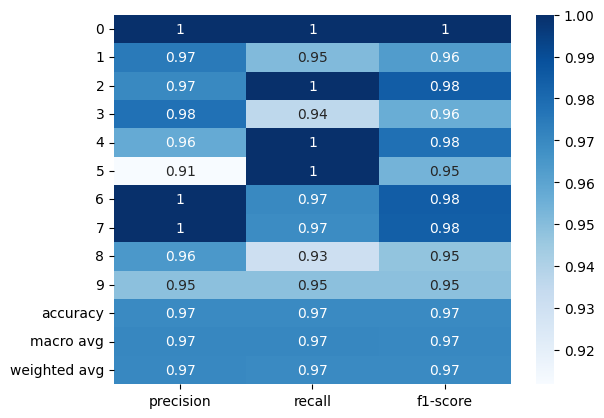

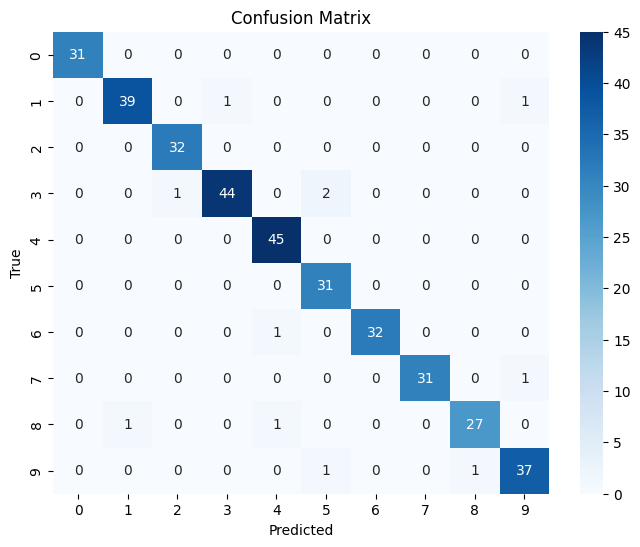

In [ ]:
model_4 = Sequential()
initializer = GlorotNormal()
model_4.add(InputLayer(input_shape=(X.shape[1],), activation='relu', kernel_initializer=initializer))
model_4.add(Dense(384, activation='relu', kernel_initializer=initializer))
model_4.add(Dense(num_classes, activation='softmax', kernel_initializer=initializer))

metrics = ['accuracy', 'precision', 'recall']

model_4.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=metrics,
)

learn(model_4, X, y, 125, 1, 16)

90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.3500 - loss: 2.2729 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.5694 - val_loss: 2.1809 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/2
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7037 - loss: 2.1282 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.7556 - val_loss: 1.9605 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8012 - loss: 1.8666 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.8389 - val_loss: 1.6360 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/4
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8437 - loss: 1.5424 - precision: 0.1209 - recall: 3.2364e-04 - val_accuracy: 0.8361 - val_loss: 1.3253 - val_precision: 1.0000 - val_recall: 0.0500
Epoch 5/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8474 - loss: 1.2395 - precision: 1.0000 - recall: 0.1031 - val

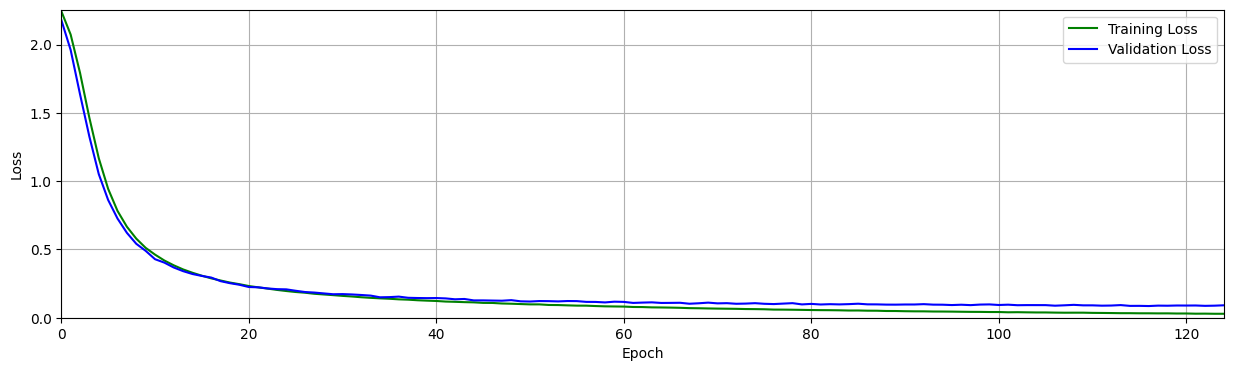

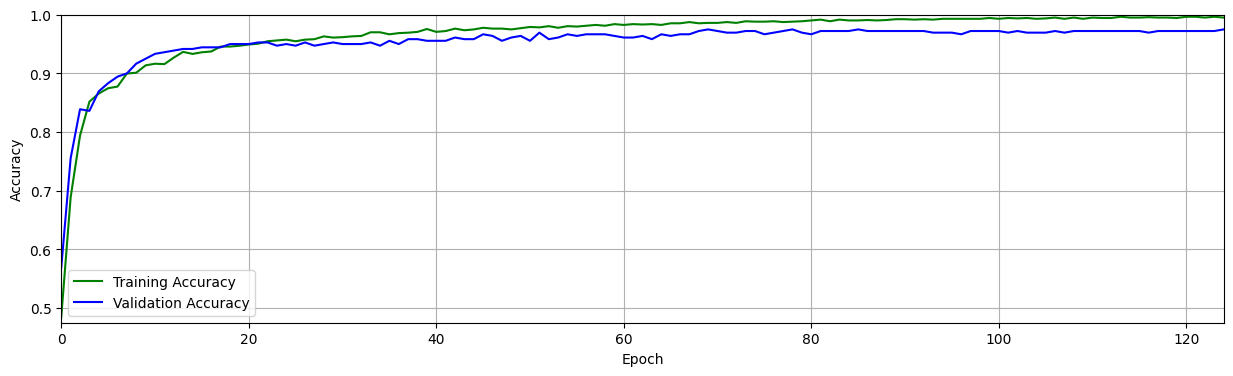

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

Classification Report:

Additional Metrics:
MCC: 0.9721



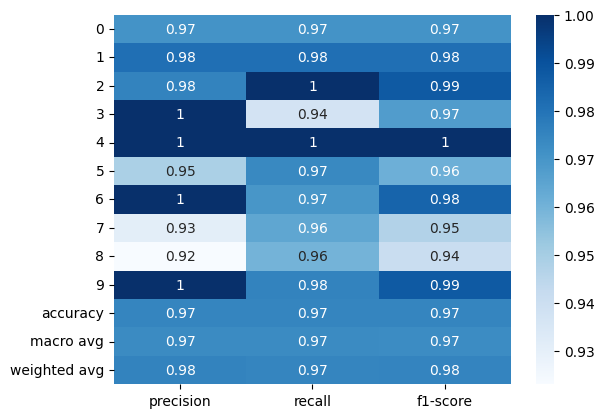

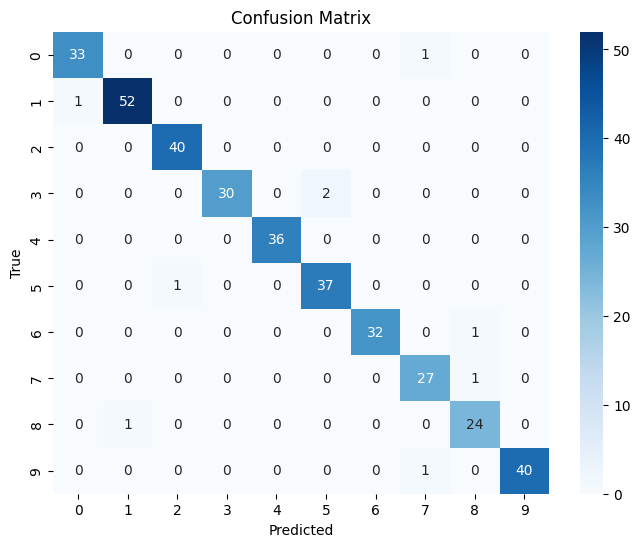

In [ ]:
model_4 = Sequential()
initializer = GlorotNormal()
model_4.add(InputLayer(input_shape=(X.shape[1],), activation='relu', kernel_initializer=initializer))
model_4.add(Dense(128, activation='relu', kernel_initializer=initializer))
model_4.add(Dense(num_classes, activation='softmax', kernel_initializer=initializer))

metrics = ['accuracy', 'precision', 'recall']

model_4.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=metrics,
)

learn(model_4, X, y, 125, 1, 16)

90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1967 - loss: 2.2786 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.7778 - val_loss: 2.1815 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/2
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6212 - loss: 2.1353 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.6917 - val_loss: 1.9531 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6538 - loss: 1.8692 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.7944 - val_loss: 1.6199 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/4
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7295 - loss: 1.5459 - precision: 0.8022 - recall: 0.0071 - val_accuracy: 0.8389 - val_loss: 1.2995 - val_precision: 1.0000 - val_recall: 0.0417
Epoch 5/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7726 - loss: 1.2655 - precision: 1.0000 - recall: 0.1232 - val_accuracy

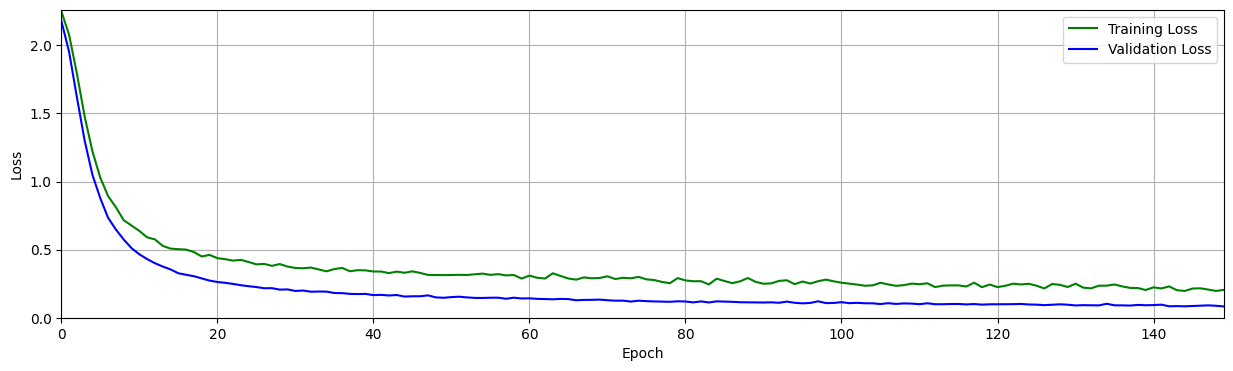

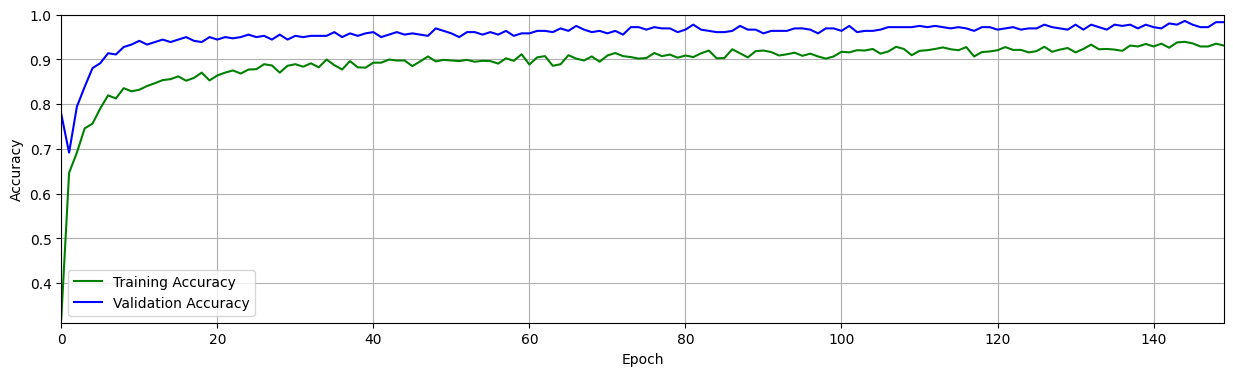

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

Classification Report:

Additional Metrics:
MCC: 0.9814



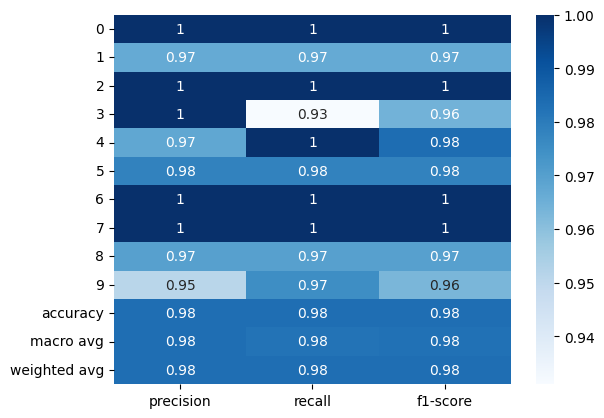

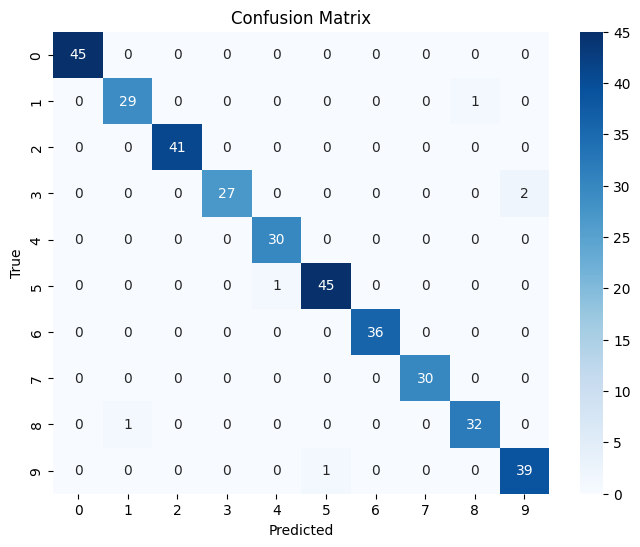

In [ ]:
model_4 = Sequential()
initializer = GlorotNormal()
model_4.add(InputLayer(input_shape=(X.shape[1],), activation='relu', kernel_initializer=initializer))
model_4.add(Dropout(0.2))
model_4.add(Dense(184, activation='relu', kernel_initializer=initializer))
model_4.add(Dropout(0.2))
model_4.add(Dense(num_classes, activation='softmax', kernel_initializer=initializer))

metrics = ['accuracy', 'precision', 'recall']

model_4.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=metrics,
)

learn(model_4, X, y, 150, 1, 16)